In [140]:
#import pandas
import pandas as pd
import numpy as np

dataset = 'purity'

if dataset == 'purity':
    col_names = ['r-local', 'w-local', 'r-global', 'w-global',
                'w-para', 'w-non-fresh', 'faulty']
    # load dataset
    pima = pd.read_csv("regression/constructs/regression-best.csv", header=None, names=col_names, sep=';')
elif dataset == 'old':
    col_names =  ['DepthOfInheritanceTree','LackOfCohesionOfMethods','WeightedMethodsPerClass','ResponseForAClass','SourceLinesOfCode','CommentDensity','LambdaCount','SourceLinesOfLambda','LambdaScore','LambdaFieldVariableUsageCount','LambdaLocalVariableUsageCount','LambdaSideEffectCount','UnterminatedCollections','CyclomaticComplexity', 'r-local', 'w-local', 'r-global', 'w-global', 'w-para', 'w-non-fresh', 'faulty']
    pima = pd.read_csv("regression/old-metrics-jellyfin.csv", header=None, names=col_names, sep=';')
pima.head()


pima.groupby('faulty').count()


,r-local,w-local,r-global,w-global,w-para,w-non-fresh
faulty,,,,,,
0,233260,233260,233260,233260,233260,233260
1,52974,52974,52974,52974,52974,52974


In [141]:
from sklearn.metrics import confusion_matrix, r2_score, precision_score, recall_score, matthews_corrcoef, f1_score
def get_stats(actual, predicted):
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    r2 = r2_score(actual, predicted)
    fscore = f1_score(actual, predicted) * 100
    precision = precision_score(actual, predicted, zero_division=0) * 100
    recall = recall_score(actual, predicted, zero_division=0) * 100
    mcc = matthews_corrcoef(actual, predicted)
    return {
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'tp': tp,
        'r2': r2,
        'fscore': fscore,
        'precision': precision,
        'recall': recall,
        'mcc': mcc,
    }

In [142]:

if dataset == 'purity':
    feature_cols = ['r-local', 'w-local', 'r-global', 'w-global', 'w-para', 'w-non-fresh']
elif dataset == 'old':
    feature_cols = ['DepthOfInheritanceTree','LackOfCohesionOfMethods','WeightedMethodsPerClass', 'ResponseForAClass','SourceLinesOfCode','CommentDensity','LambdaCount','SourceLinesOfLambda','LambdaScore','LambdaFieldVariableUsageCount','LambdaLocalVariableUsageCount','LambdaSideEffectCount','UnterminatedCollections','CyclomaticComplexity','r-local', 'w-local', 'r-global', 'w-global', 'w-para', 'w-non-fresh']
    

X = pima[feature_cols] # Features
y = pima['faulty'] # Target variable

In [143]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [144]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

cv = KFold(n_splits=10, random_state=1, shuffle=True)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test) # cross_val_predict(logreg, X, y, cv=cv)
y_pred_proba = logreg.predict_proba(X_test) # cross_val_predict(logreg, X, y, cv=cv)
y_pred_proba = np.max(y_pred_proba, axis=1)

stats = get_stats(y_test, y_pred)

In [145]:
print("Precision", stats['precision'])
print("Recall", stats["recall"])
print("Fscore", stats["fscore"])
print("R^2", stats['r2'])
print("Precission good:", stats['tp'] / (stats['fp'] +  stats['tp']) * 100, "%")
print("Precission faulty:", stats['tn'] / (stats['tn'] +  stats['fn']) * 100, "%")

print(stats['fn'])
print(stats['tn'])


Precision 31.395662131213797
Recall 35.045112781954884
Fscore 33.120159170041916
R^2 -0.7384472217464995
Precission good: 31.395662131213797 %
Precission faulty: 84.76716096838467 %
8639
48074


In [146]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[48074, 10185],
       [ 8639,  4661]], dtype=int64)

In [147]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)

coefficients

,0,0
0,r-local,0.068495
1,w-local,0.195248
2,r-global,0.259815
3,w-global,0.448558
4,w-para,0.086951
5,w-non-fresh,0.292932


In [148]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

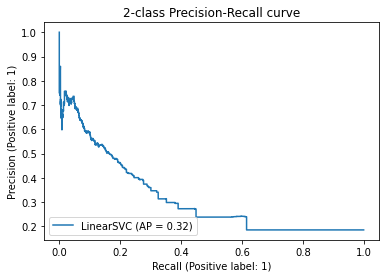

In [149]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    logreg, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

c:\Users\BjornJ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\BjornJ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\BjornJ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

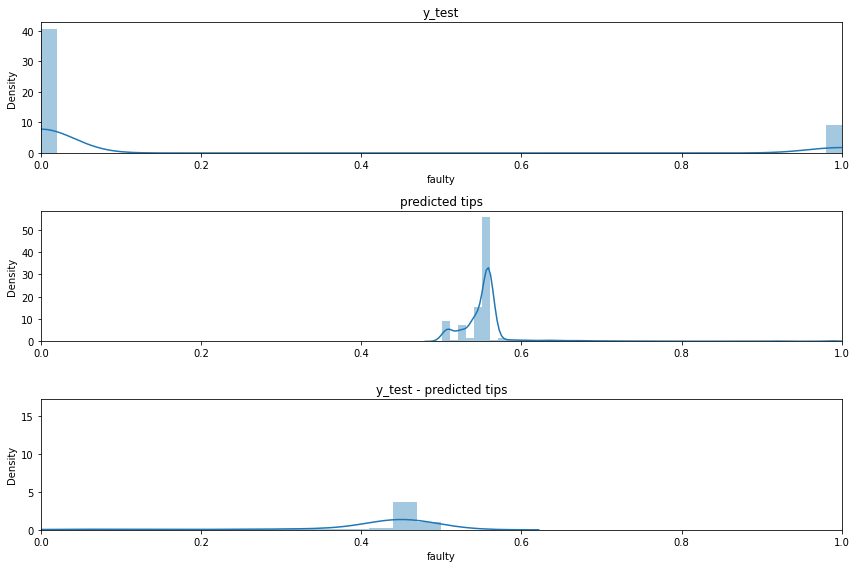

In [150]:
import seaborn as sb

# Code to reproduce the plot below
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(311)
sb.distplot(y_test)
plt.title('y_test')
plt.xlim([0, 1])


ax = fig.add_subplot(312)
sb.distplot(y_pred_proba)
plt.title('predicted tips')
plt.xlim([0, 1])

ax = fig.add_subplot(313)
sb.distplot(y_test - y_pred_proba)
plt.title('y_test - predicted tips')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()

Text(0.5, 257.44, 'Predicted label')

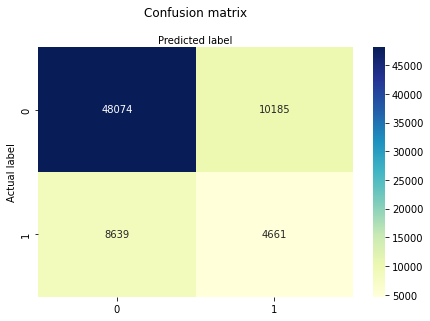

In [151]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [152]:
print("F-Score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

F-Score: 0.3312015917004192
Precision: 0.313956621312138
Recall: 0.35045112781954885


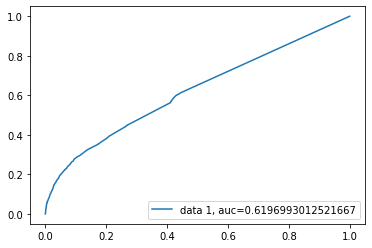

In [153]:
y_pred_proba = logreg.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [154]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 faulty   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1503.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:59:05   Log-Likelihood:            -1.3098e+05
No. Observations:              286234   AIC:                         2.620e+05
Df Residuals:                  286227   BIC:                         2.620e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1652      0.001    218.796      